# Cooperating rates

In [1]:
import evol_dynamics

In [2]:
import pandas as pd
import dask.dataframe as dd

import numpy as np
import tqdm
import itertools

In [146]:
import matplotlib.pyplot as plt
import matplotlib

cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples"), matplotlib.cm.get_cmap("Oranges")]

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import glob

In [5]:
import matplotlib.colors as colors

In [6]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [7]:
matplotlib.rc('font', **font)

**Generate plot across axis**

In [8]:
Ss = [2, 1.6, 1.2, 0.8, 0.4, 0, -0.4, -0.8, -1.2, -1.6, -2]
Ts = [-1, -0.6, -0.2,  0.2,  0.6,  1,  1.4,  1.8,  2.2,  2.6,  3]

In [9]:
sorted_cvs_files_expected = [f"../matlab/data/expected/clean_S_{S}_T_{T}_stochastic_0.csv" for S in Ss for T in Ts]

In [10]:
cooperation_rates_expected = np.zeros((11, 11))
scores_expected = np.zeros((11, 11))

In [28]:
df = pd.read_csv("../matlab/data/stochastic/clean_S_0_T_1.8_stochastic_1.csv")

In [29]:
sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))

0.45393381352392925

In [11]:
for i, file in enumerate(sorted_cvs_files_expected):
    x = int(i / 11)
    y = i % 11
    
    df = pd.read_csv(file)
    
    cooperation_rates_expected[int(x), int(y)] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    scores_expected[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

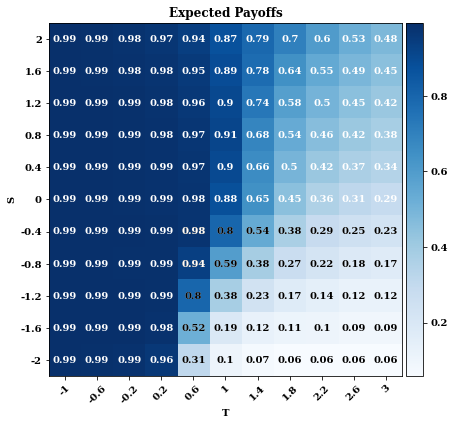

In [124]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_expected, cmap=cmaps[0])

axes.set_xticks(range(11))
axes.set_yticks(range(11))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

    
for k in range(11):
    for j in range(11):
        text = axes.text(j, k, round(cooperation_rates_expected[k, j], 2),
                       ha="center", va="center", color="w")
        
        
for k in range(6, 11):
    for j in range(4, 11):
        text = axes.text(j, k, round(cooperation_rates_expected[k, j], 2),
                       ha="center", va="center", color="black")

text = axes.text(4, 6, round(cooperation_rates_expected[6, 4], 2), ha="center", va="center", color="w")
text = axes.text(4, 7, round(cooperation_rates_expected[7, 4], 2), ha="center", va="center", color="w")

axes.set_title("Expected Payoffs", weight="bold");

fig.savefig("../static/expected_two_by_two_games_cooperation.pdf", bbox_inches='tight')

**Similar for stochastic payoffs**

In [13]:
sorted_cvs_files_stochastic = [f"../matlab/data/stochastic/clean_S_{S}_T_{T}_stochastic_1.csv" for S in Ss for T in Ts]

In [14]:
cooperation_rates_stoch = np.zeros((11, 11))
scores_stoch = np.zeros((11, 11))

In [15]:
for i, file in enumerate(sorted_cvs_files_stochastic):
    x = int(i / 11)
    y = i % 11
    
    df = dd.read_csv(file)
    
    cooperation_rates_stoch[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

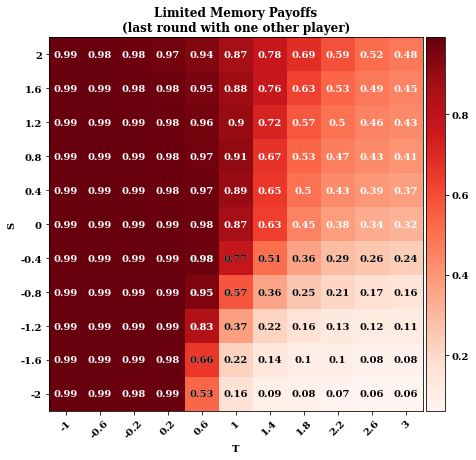

In [123]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_stoch, cmap=cmaps[1])

axes.set_xticks(range(11))
axes.set_yticks(range(11))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")


divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

for k in range(11):
    for j in range(11):
        text = axes.text(j, k, round(cooperation_rates_stoch[k, j], 2),
                       ha="center", va="center", color="w")
        
        
for k in range(6, 11):
    for j in range(4, 11):
        text = axes.text(j, k, round(cooperation_rates_stoch[k, j], 2),
                       ha="center", va="center", color="black")

text = axes.text(4, 6, round(cooperation_rates_stoch[6, 4], 2), ha="center", va="center", color="w")
text = axes.text(4, 7, round(cooperation_rates_stoch[7, 4], 2), ha="center", va="center", color="w")
text = axes.text(4, 8, round(cooperation_rates_stoch[8, 4], 2), ha="center", va="center", color="w")

axes.set_title("Limited Memory Payoffs" "\n" "(last round with one other player)", weight="bold",);

plt.tight_layout();
fig.savefig("../static/stochastic_two_by_two_games_cooperation.pdf", bbox_inches='tight')

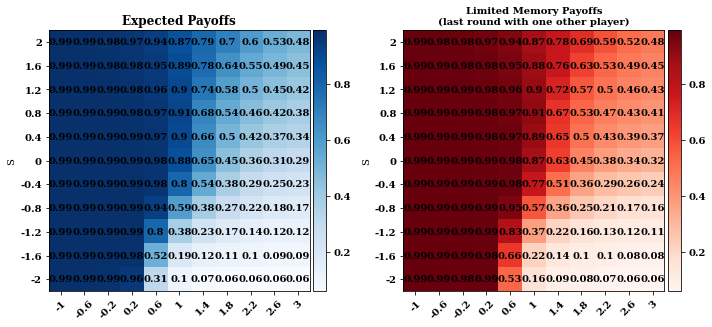

In [76]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 25))

for i, rates in enumerate([cooperation_rates_expected, cooperation_rates_stoch]):

    im = axes[i].imshow(rates, cmap=cmaps[i])

    axes[i].set_xticks(range(11))
    axes[i].set_yticks(range(11))

    axes[i].set_xticklabels(Ts, rotation=45)
    axes[i].set_yticklabels(Ss)
    
    axes[i].set_ylabel('T')
    axes[i].set_ylabel('S')

    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical');
    
    for k in range(11):
        for j in range(11):
            text = axes[i].text(j, k, round(rates[k, j], 2),
                           ha="center", va="center", color="black")

axes[0].set_title("Expected Payoffs", weight="bold");
axes[1].set_title("Limited Memory Payoffs" "\n" "(last round with one other player)", weight="bold", fontsize=10);

plt.tight_layout()

fig.savefig("../static/stochastic_expected_two_by_two_games_cooperation.pdf", bbox_inches='tight')

In [19]:
cooperation_difference =  cooperation_rates_expected - cooperation_rates_stoch

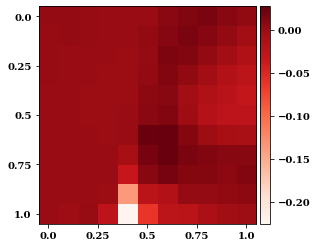

In [20]:
fig, axes = plt.subplots()

im = axes.imshow(cooperation_difference, cmap=cmaps[1])

axes.set_xticks(np.linspace(0, 10, 5))
axes.set_yticks(np.linspace(0, 10, 5))

axes.set_xticklabels(np.linspace(0, 1, 5))
axes.set_yticklabels(np.linspace(0, 1, 5))



divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

**Round Two**

In [32]:
sorted_cvs_files_rounds = [f"../matlab/data/round_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [33]:
cooperation_rates_rounds = np.zeros((11, 11))

In [34]:
for i, file in enumerate(sorted_cvs_files_rounds):
    x = int(i / 11)
    y = i % 11
    
    df = pd.read_csv(file)
    
    cooperation_rates_rounds[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))

In [47]:
cooperation_rates_rounds = cooperation_rates_rounds / 2

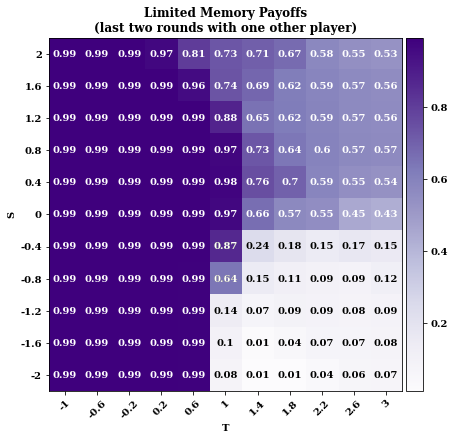

In [134]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_rounds, cmap=cmaps[3])

axes.set_xticks(range(11))
axes.set_yticks(range(11))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

for k in range(11):
    for j in range(11):
        text = axes.text(j, k, round(cooperation_rates_rounds[k, j], 2),
                       ha="center", va="center", color="w")
        
for k in range(6, 11):
    for j in range(5, 11):
        text = axes.text(j, k, round(cooperation_rates_rounds[k, j], 2),
                       ha="center", va="center", color="black")
        
text = axes.text(5, 6, round(cooperation_rates_rounds[6, 5], 2), ha="center", va="center", color="w")
text = axes.text(5, 7, round(cooperation_rates_rounds[7, 5], 2), ha="center", va="center", color="w")
        
axes.set_title("Limited Memory Payoffs" "\n" "(last two rounds with one other player)", weight="bold",);

fig.savefig("../static/rounds_two_by_two_games_cooperation.pdf", bbox_inches='tight')

**Opponents**

In [131]:
sorted_cvs_files_opponents = [f"../matlab/data/opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [132]:
cooperation_rates_opp = np.zeros((11, 11))

In [133]:
for i, file in enumerate(sorted_cvs_files_opponents):
    x = int(i / 11)
    y = i % 11
    
    df = dd.read_csv(file)
    
    cooperation_rates_opp[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
#     scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

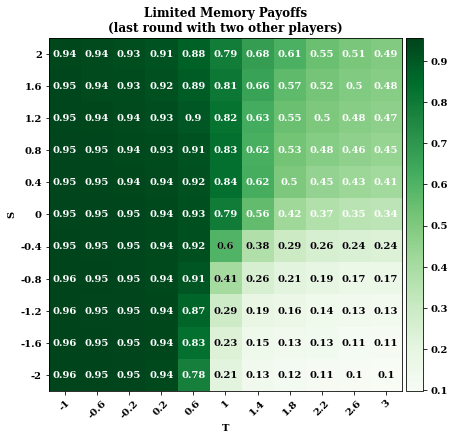

In [136]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_opp, cmap=cmaps[2])

axes.set_xticks(range(11))
axes.set_yticks(range(11))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');


for k in range(11):
    for j in range(11):
        text = axes.text(j, k, round(cooperation_rates_opp[k, j], 2),
                       ha="center", va="center", color="w")
        
for k in range(6, 11):
    for j in range(5, 11):
        text = axes.text(j, k, round(cooperation_rates_opp[k, j], 2),
                       ha="center", va="center", color="black")

axes.set_title("Limited Memory Payoffs" "\n" "(last round with two other players)", weight="bold",);

fig.savefig("../static/opponents_two_by_two_games_cooperation.pdf", bbox_inches='tight')

**Rounds - opponents**

In [137]:
sorted_cvs_files_last = [f"../matlab/data/rounds_opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [138]:
cooperation_rates_last = np.zeros((11, 11))

In [139]:
for i, file in enumerate(sorted_cvs_files_last):
    x = int(i / 11)
    y = i % 11
    
    df = dd.read_csv(file)
    
    cooperation_rates_last[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
#     scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

In [148]:
cooperation_rates_last = cooperation_rates_last / 2

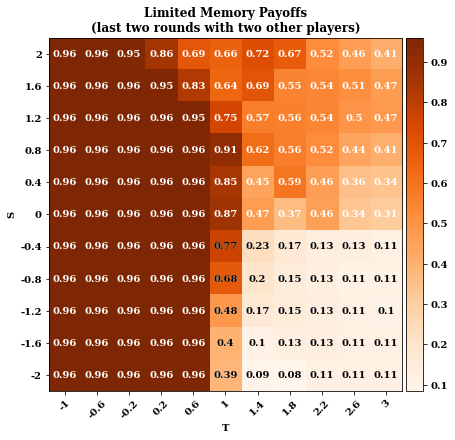

In [149]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_last, cmap=cmaps[4])


axes.set_xticks(range(11))
axes.set_yticks(range(11))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');


for k in range(11):
    for j in range(11):
        text = axes.text(j, k, round(cooperation_rates_last[k, j], 2),
                       ha="center", va="center", color="w")
        
for k in range(6, 11):
    for j in range(5, 11):
        text = axes.text(j, k, round(cooperation_rates_last[k, j], 2),
                       ha="center", va="center", color="black")

axes.set_title("Limited Memory Payoffs" "\n" "(last two rounds with two other players)", weight="bold",);

fig.savefig("../static/rounds_opponents_two_by_two_games_cooperation.pdf", bbox_inches='tight')